In [1]:
#GCD and LCM

GCD(48, 180) = 12
LCM(48, 180) = 720


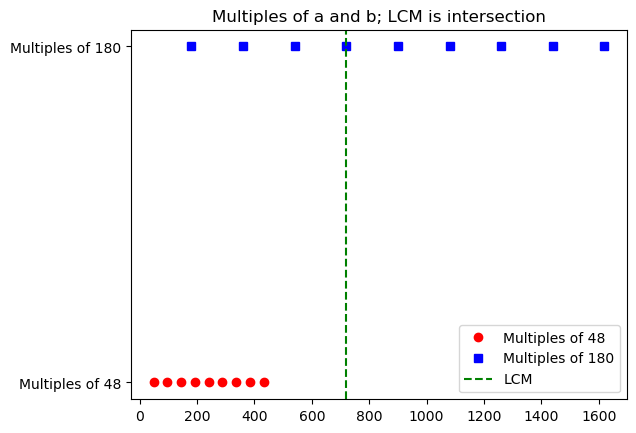

In [2]:
# Cell 1: GCD and LCM
import math
import matplotlib.pyplot as plt

def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def lcm(a, b):
    return a // gcd(a, b) * b

# Dry run example:
a, b = 48, 180
print(f"GCD({a}, {b}) = {gcd(a,b)}")
print(f"LCM({a}, {b}) = {lcm(a,b)}")

# Visualization: Plotting multiples to show LCM intersection
multiples_a = [a*i for i in range(1, 10)]
multiples_b = [b*i for i in range(1, 10)]

plt.plot(multiples_a, [1]*len(multiples_a), 'ro', label=f'Multiples of {a}')
plt.plot(multiples_b, [2]*len(multiples_b), 'bs', label=f'Multiples of {b}')
plt.axvline(lcm(a,b), color='g', linestyle='--', label='LCM')
plt.legend()
plt.yticks([1,2], [f'Multiples of {a}', f'Multiples of {b}'])
plt.title("Multiples of a and b; LCM is intersection")
plt.show()


In [3]:
#Modular exponentiation

3^13 mod 100 = 23


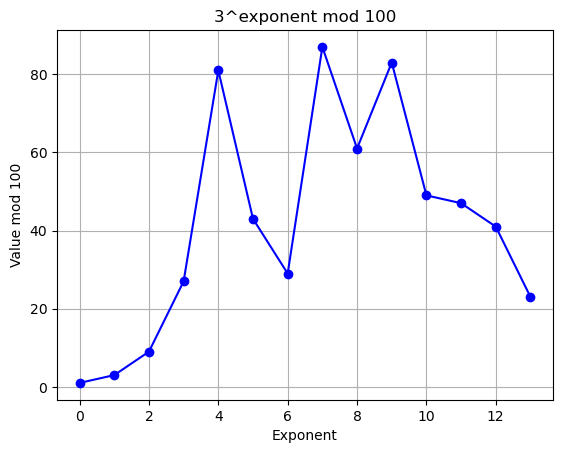

In [4]:
# Cell 2: Modular Exponentiation (Binary Exponentiation)
def mod_exp(base, exponent, mod):
    result = 1
    base %= mod
    while exponent > 0:
        if exponent & 1:
            result = (result * base) % mod
        base = (base * base) % mod
        exponent >>= 1
    return result

# Example:
print("3^13 mod 100 =", mod_exp(3, 13, 100))

# Visualization: Plot how power grows & modulo reduces it
x_vals = list(range(14))
y_vals = [pow(3, i, 100) for i in x_vals]

plt.plot(x_vals, y_vals, 'bo-')
plt.title("3^exponent mod 100")
plt.xlabel("Exponent")
plt.ylabel("Value mod 100")
plt.grid(True)
plt.show()


In [5]:
#Modular inverse

Modular inverse of 3 mod 11 is 4


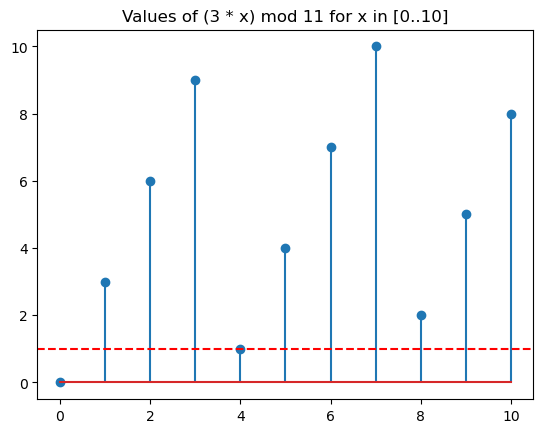

In [12]:
# Cell 3: Modular Inverse using Extended Euclidean Algorithm
def extended_gcd(a, b):
    if b == 0:
        return (a, 1, 0)
    gcd, x1, y1 = extended_gcd(b, a % b)
    x = y1
    y = x1 - (a // b) * y1
    return gcd, x, y

def mod_inverse(a, m):
    gcd, x, _ = extended_gcd(a, m)
    if gcd != 1:
        return None  # Inverse doesn't exist
    return x % m

# Example:
a, m = 3, 11
inv = mod_inverse(a, m)
print(f"Modular inverse of {a} mod {m} is {inv}")

# Verification plot
import matplotlib.pyplot as plt
vals = [(a * i) % m for i in range(m)]
plt.stem(range(m), vals)  # Removed use_line_collection parameter
plt.axhline(1, color='r', linestyle='--')
plt.title(f"Values of (3 * x) mod 11 for x in [0..{m-1}]")
plt.show()



In [8]:
#Prime seive

Primes up to 50: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


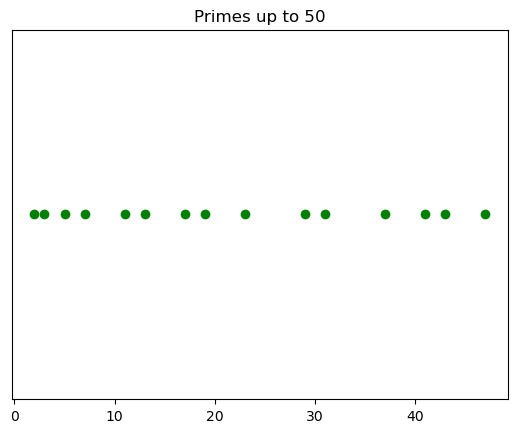

In [9]:
# Cell 4: Sieve of Eratosthenes (Prime numbers up to n)
def sieve(n):
    prime = [True]*(n+1)
    prime[0], prime[1] = False, False
    for i in range(2, int(n**0.5)+1):
        if prime[i]:
            for j in range(i*i, n+1, i):
                prime[j] = False
    return prime

n = 50
prime_list = sieve(n)
primes = [i for i in range(n+1) if prime_list[i]]
print(f"Primes up to {n}:", primes)

# Visualization: Plot primes as dots on number line
plt.scatter(primes, [1]*len(primes), color='green')
plt.yticks([])
plt.title(f"Primes up to {n}")
plt.show()


In [10]:
# Factorials and Binomial Coefficients (nCr) with Modulo

10 choose 3 = 120


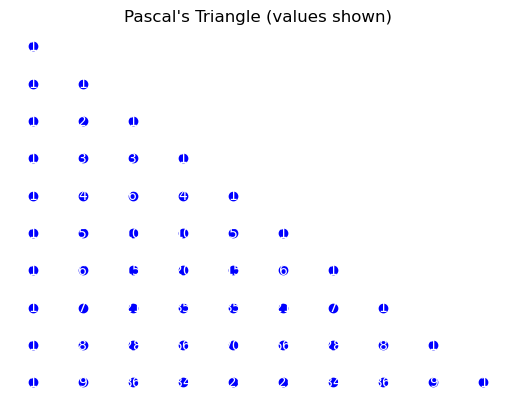

In [11]:
# Cell 5: Factorials and Binomial Coefficients (nCr) with Modulo
MOD = 10**9 + 7

def factorial(n):
    fact = [1]*(n+1)
    for i in range(2, n+1):
        fact[i] = fact[i-1]*i % MOD
    return fact

def mod_inv(a, m=MOD):
    # Fermat's little theorem (mod prime)
    return pow(a, m-2, m)

def nCr(n, r, fact):
    if r > n or r < 0:
        return 0
    return fact[n] * mod_inv(fact[r]) % MOD * mod_inv(fact[n-r]) % MOD

fact = factorial(20)
print("10 choose 3 =", nCr(10, 3, fact))

# Visualization: Plot Pascal’s triangle mod MOD for first 10 rows
triangle = [[1]]
for i in range(1, 10):
    row = [1]
    for j in range(1, i):
        row.append((triangle[i-1][j-1] + triangle[i-1][j]) % MOD)
    row.append(1)
    triangle.append(row)

for i, row in enumerate(triangle):
    plt.scatter(range(len(row)), [i]*len(row), c='b')
    for j, val in enumerate(row):
        plt.text(j, i, str(val), ha='center', va='center', color='white')

plt.gca().invert_yaxis()
plt.title("Pascal's Triangle (values shown)")
plt.axis('off')
plt.show()


In [13]:
#Extended euclid

gcd(56, 15) = 1, x = -4, y = 15
Check: 56*-4 + 15*15 = 1


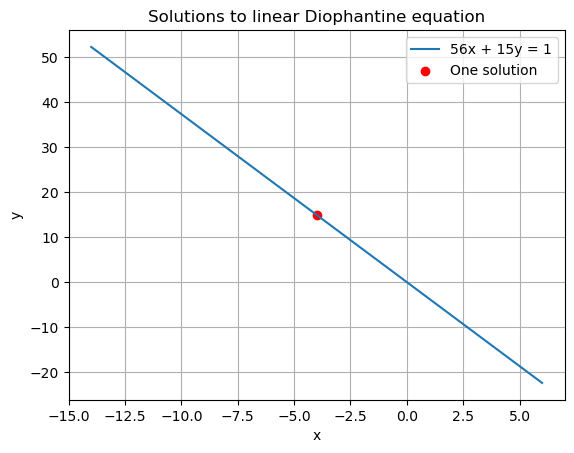

In [14]:
# Cell 6: Extended Euclidean Algorithm (for solving ax + by = gcd(a,b))

def extended_gcd(a, b):
    if b == 0:
        return (a, 1, 0)
    gcd, x1, y1 = extended_gcd(b, a % b)
    x = y1
    y = x1 - (a // b) * y1
    return gcd, x, y

# Example: solve 56x + 15y = gcd(56,15)
a, b = 56, 15
g, x, y = extended_gcd(a, b)
print(f"gcd({a}, {b}) = {g}, x = {x}, y = {y}")
print(f"Check: {a}*{x} + {b}*{y} = {a*x + b*y}")

# Visualization: plot line ax + by = gcd(a,b) with solution points around x,y
import numpy as np
x_vals = np.linspace(x-10, x+10, 400)
y_vals = (g - a * x_vals) / b

plt.plot(x_vals, y_vals, label=f"{a}x + {b}y = {g}")
plt.scatter([x], [y], color='red', label="One solution")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solutions to linear Diophantine equation")
plt.grid(True)
plt.show()


In [15]:
#Chinese remainder theorem

x ≡ 2 (mod 3), x ≡ 3 (mod 5) => x = 8 mod 15


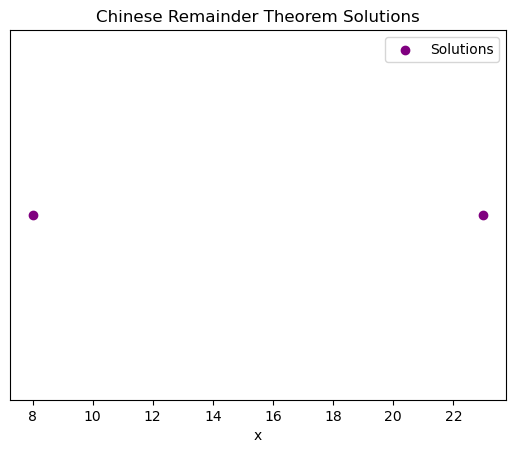

In [16]:
# Cell 7: Chinese Remainder Theorem (CRT)

def crt(a1, m1, a2, m2):
    # Solve system:
    # x ≡ a1 (mod m1)
    # x ≡ a2 (mod m2)
    g, x, y = extended_gcd(m1, m2)
    if (a1 - a2) % g != 0:
        return None  # No solution
    lcm = m1 // g * m2
    x = (a1 * (m2 // g) * y + a2 * (m1 // g) * x) % lcm
    return (x + lcm) % lcm

# Example:
a1, m1 = 2, 3
a2, m2 = 3, 5
res = crt(a1, m1, a2, m2)
print(f"x ≡ {a1} (mod {m1}), x ≡ {a2} (mod {m2}) => x = {res} mod {m1*m2}")

# Visualization: Plotting solution on number line for multiples of moduli
modulus = m1 * m2
x_vals = list(range(0, modulus*2))
valid = [x for x in x_vals if x % m1 == a1 and x % m2 == a2]

plt.scatter(valid, [1]*len(valid), color='purple', label='Solutions')
plt.title("Chinese Remainder Theorem Solutions")
plt.yticks([])
plt.xlabel('x')
plt.legend()
plt.show()


In [17]:
#Euler totient function

phi(1) = 1
phi(2) = 1
phi(5) = 4
phi(10) = 4
phi(15) = 8
phi(36) = 12


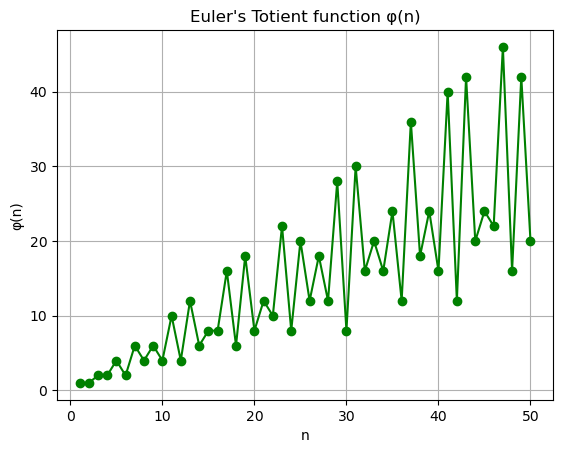

In [18]:
# Cell 8: Euler’s Totient Function φ(n)

def phi(n):
    result = n
    p = 2
    while p * p <= n:
        if n % p == 0:
            while n % p == 0:
                n //= p
            result -= result // p
        p += 1
    if n > 1:
        result -= result // n
    return result

# Example:
for n in [1, 2, 5, 10, 15, 36]:
    print(f"phi({n}) = {phi(n)}")

# Visualization: Plot φ(n) vs n for first 50 numbers
ns = list(range(1, 51))
phis = [phi(x) for x in ns]

plt.plot(ns, phis, 'go-')
plt.title("Euler's Totient function φ(n)")
plt.xlabel("n")
plt.ylabel("φ(n)")
plt.grid(True)
plt.show()


In [19]:
#Mobius function

μ(1) = 1
μ(2) = -1
μ(3) = -1
μ(4) = 0
μ(5) = -1
μ(6) = 1
μ(7) = -1
μ(8) = 0
μ(9) = 0
μ(10) = 1
μ(11) = -1
μ(12) = 0
μ(13) = -1
μ(14) = 1
μ(15) = 1
μ(16) = 0
μ(17) = -1
μ(18) = 0
μ(19) = -1
μ(20) = 0


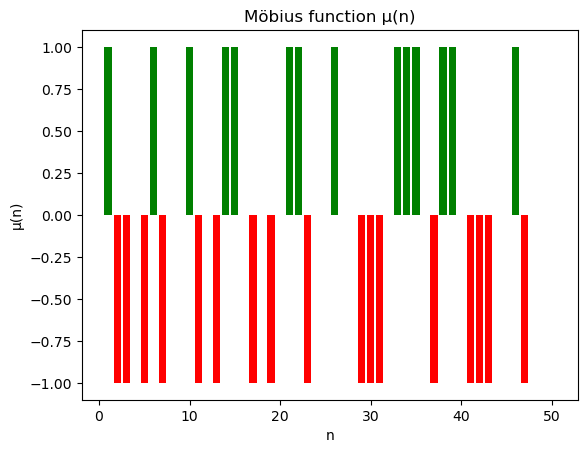

In [20]:
# Cell 9: Möbius Function μ(n)

def mobius(n):
    p = 2
    cnt = 0
    while p * p <= n:
        if n % p == 0:
            n //= p
            if n % p == 0:
                return 0
            cnt += 1
        p += 1
    if n > 1:
        cnt += 1
    return -1 if cnt % 2 else 1

# Example:
for n in range(1, 21):
    print(f"μ({n}) = {mobius(n)}")

# Visualization: Bar plot for μ(n) values -1,0,1
import numpy as np
vals = [mobius(i) for i in range(1, 51)]
plt.bar(range(1, 51), vals, color=['red' if v==-1 else 'green' if v==1 else 'gray' for v in vals])
plt.title("Möbius function μ(n)")
plt.xlabel("n")
plt.ylabel("μ(n)")
plt.show()


In [21]:
#Fast fourier transform

Polynomial multiplication result coefficients: [ 4 13 22 15]


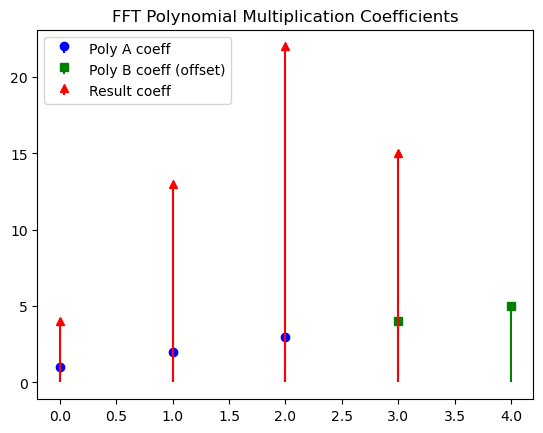

In [22]:
# Cell 10: Fast Fourier Transform (FFT) - Polynomial Multiplication

import numpy as np

def fft_multiply(a, b):
    n = 1
    while n < len(a) + len(b):
        n <<= 1
    A = np.fft.fft(a, n)
    B = np.fft.fft(b, n)
    C = A * B
    c = np.fft.ifft(C).real.round().astype(int)
    return c[:len(a)+len(b)-1]

# Example: multiply (1 + 2x + 3x^2) * (4 + 5x)
a = [1, 2, 3]
b = [4, 5]

result = fft_multiply(a, b)
print("Polynomial multiplication result coefficients:", result)

# Visualization: plot input polynomials and result coefficients
plt.stem(range(len(a)), a, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.stem(range(len(a), len(a)+len(b)), b, linefmt='g-', markerfmt='gs', basefmt=' ')
plt.stem(range(len(result)), result, linefmt='r-', markerfmt='r^', basefmt=' ')
plt.legend(["Poly A coeff", "Poly B coeff (offset)", "Result coeff"])
plt.title("FFT Polynomial Multiplication Coefficients")
plt.show()


In [23]:
# Primality Test

1: Not prime
2: Prime
3: Prime
4: Not prime
5: Prime
6: Not prime
7: Prime
8: Not prime
9: Not prime
10: Not prime
11: Prime
12: Not prime
13: Prime
14: Not prime
15: Not prime
16: Not prime
17: Prime
18: Not prime
19: Prime
20: Not prime
21: Not prime
22: Not prime
23: Prime
24: Not prime
25: Not prime
26: Not prime
27: Not prime
28: Not prime
29: Prime


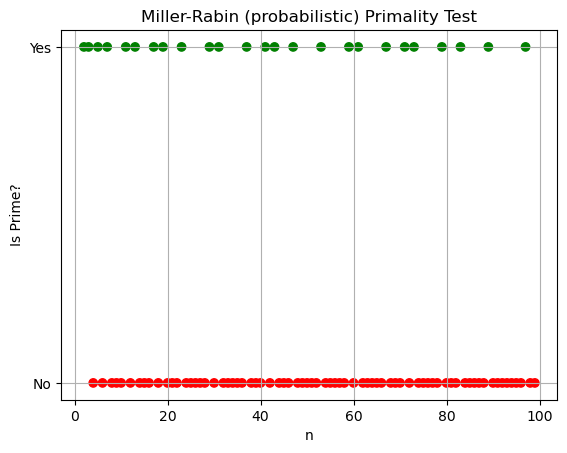

In [24]:
# Cell 11: Miller-Rabin Primality Test (Probabilistic)

import random

def is_prime(n, k=5):
    if n <= 1: return False
    if n <= 3: return True
    if n % 2 == 0: return False
    
    # Write n - 1 = 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        d //= 2
        r += 1
    
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

# Test examples
for num in range(1, 30):
    print(f"{num}: {'Prime' if is_prime(num) else 'Not prime'}")

# Visualization: Mark primes under 100
nums = list(range(2, 100))
results = [is_prime(n) for n in nums]
plt.scatter(nums, results, c=["green" if r else "red" for r in results])
plt.title("Miller-Rabin (probabilistic) Primality Test")
plt.xlabel("n")
plt.ylabel("Is Prime?")
plt.yticks([0, 1], ["No", "Yes"])
plt.grid(True)
plt.show()


In [25]:
# Segment tree

Query [1, 4): 16
After update, Query [1, 4): 21


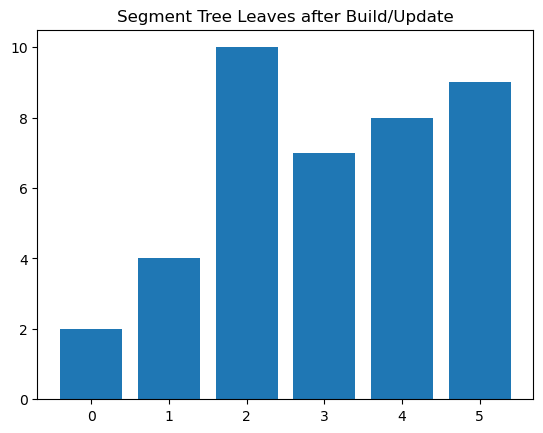

In [26]:
# Cell 12: Segment Tree (Range Sum Query)

class SegmentTree:
    def __init__(self, data):
        self.n = len(data)
        self.tree = [0] * (2 * self.n)
        self.build(data)

    def build(self, data):
        for i in range(self.n):
            self.tree[self.n + i] = data[i]
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[i << 1] + self.tree[i << 1 | 1]

    def update(self, pos, value):
        pos += self.n
        self.tree[pos] = value
        while pos > 1:
            pos >>= 1
            self.tree[pos] = self.tree[pos << 1] + self.tree[pos << 1 | 1]

    def query(self, l, r):
        res = 0
        l += self.n
        r += self.n
        while l < r:
            if l & 1:
                res += self.tree[l]
                l += 1
            if r & 1:
                r -= 1
                res += self.tree[r]
            l >>= 1
            r >>= 1
        return res

# Example usage:
arr = [2, 4, 5, 7, 8, 9]
st = SegmentTree(arr)
print("Query [1, 4):", st.query(1, 4))  # 4 + 5 + 7
st.update(2, 10)
print("After update, Query [1, 4):", st.query(1, 4))

# Visualization: Plot array and its segment sums
sums = [st.query(i, i+1) for i in range(len(arr))]
plt.bar(range(len(arr)), sums)
plt.title("Segment Tree Leaves after Build/Update")
plt.show()


In [27]:
#Binary indexed tree

Prefix sum[4]: 25


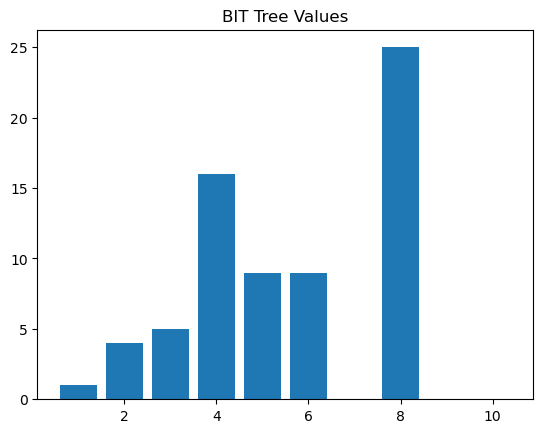

In [28]:
# Cell 13: Binary Indexed Tree (Fenwick Tree)

class BIT:
    def __init__(self, size):
        self.n = size
        self.tree = [0] * (self.n + 1)

    def update(self, index, delta):
        index += 1
        while index <= self.n:
            self.tree[index] += delta
            index += index & -index

    def query(self, index):
        index += 1
        res = 0
        while index:
            res += self.tree[index]
            index -= index & -index
        return res

    def range_query(self, left, right):
        return self.query(right) - self.query(left - 1)

# Example
bit = BIT(10)
for i, v in enumerate([1, 3, 5, 7, 9]):
    bit.update(i, v)
print("Prefix sum[4]:", bit.query(4))

# Visualization: Tree state
plt.bar(range(1, 11), bit.tree[1:])
plt.title("BIT Tree Values")
plt.show()


In [29]:
#Euler tour


Euler Tour Start/End: {1: 0, 2: 1, 4: 2, 5: 3, 3: 4} {4: 3, 5: 4, 2: 4, 3: 5, 1: 5}
Flattened order: [1, 2, 4, 5, 3]


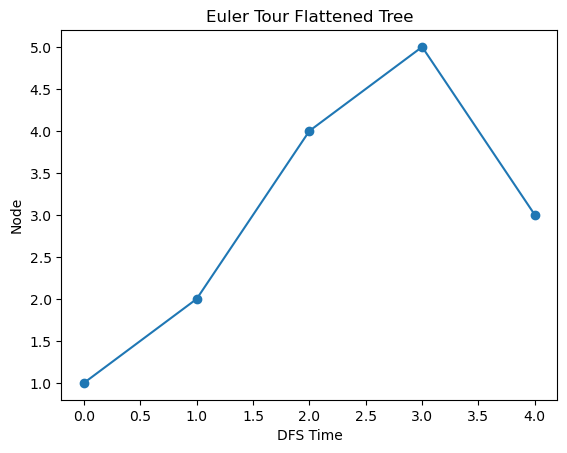

In [30]:
# Cell 14: Euler Tour (Flattening a Tree)

from collections import defaultdict

# Sample Tree
graph = defaultdict(list)
edges = [(1, 2), (1, 3), (2, 4), (2, 5)]
for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)

time = 0
start = {}
end = {}
flat = []

def dfs(node, parent):
    global time
    start[node] = time
    flat.append(node)
    time += 1
    for child in graph[node]:
        if child != parent:
            dfs(child, node)
    end[node] = time

dfs(1, -1)
print("Euler Tour Start/End:", start, end)
print("Flattened order:", flat)

# Visualization
plt.plot(range(len(flat)), flat, marker='o')
plt.title("Euler Tour Flattened Tree")
plt.xlabel("DFS Time")
plt.ylabel("Node")
plt.show()


In [31]:
# Game Theory – Grundy Numbers (Nim Game)

Nim Sum: 2
First player win?


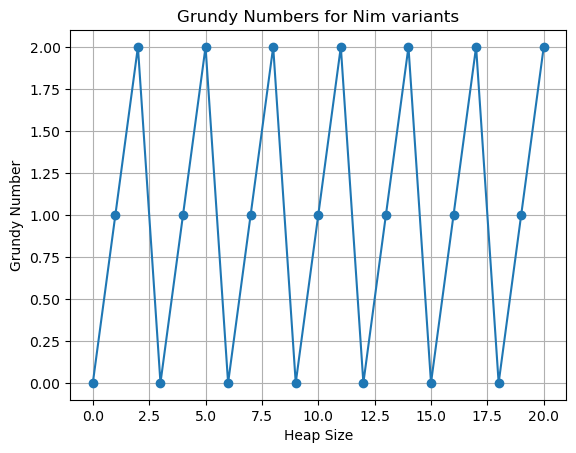

In [32]:
# Cell 15: Game Theory – Grundy Numbers (Nim Game)

def grundy(n):
    if n == 0:
        return 0
    moves = [n - 1, n - 2]
    g = set(grundy(m) for m in moves if m >= 0)
    mex = 0
    while mex in g:
        mex += 1
    return mex

# Simple Nim example:
heaps = [3, 4, 5]
nim_sum = 0
for h in heaps:
    nim_sum ^= h
print("Nim Sum:", nim_sum)
print("First player win?" if nim_sum != 0 else "Second player win")

# Visualization: Grundy numbers for n=0..20
gs = [grundy(i) for i in range(21)]
plt.plot(range(21), gs, marker='o')
plt.title("Grundy Numbers for Nim variants")
plt.xlabel("Heap Size")
plt.ylabel("Grundy Number")
plt.grid(True)
plt.show()


In [33]:
#Convex hull

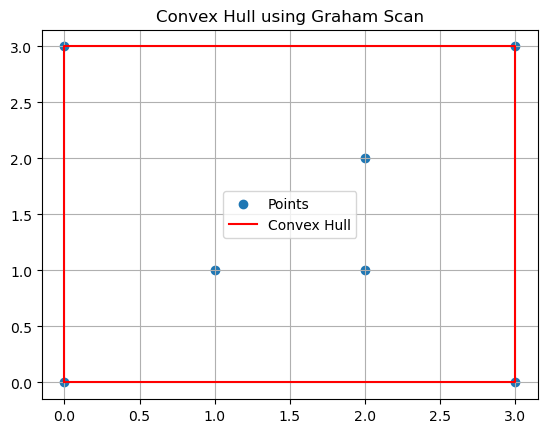

In [34]:
# Cell 16: Convex Hull – Graham Scan (2D Geometry)

from collections import namedtuple
Point = namedtuple("Point", "x y")

def orientation(p, q, r):
    val = (q.y - p.y)*(r.x - q.x) - (q.x - p.x)*(r.y - q.y)
    if val == 0: return 0  # colinear
    return 1 if val > 0 else 2  # clock / counter-clock

def convex_hull(points):
    points = sorted(set(points), key=lambda p: (p.x, p.y))
    
    if len(points) < 3:
        return points

    # Lower hull
    lower = []
    for p in points:
        while len(lower) >= 2 and orientation(lower[-2], lower[-1], p) != 2:
            lower.pop()
        lower.append(p)

    # Upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and orientation(upper[-2], upper[-1], p) != 2:
            upper.pop()
        upper.append(p)

    return lower[:-1] + upper[:-1]

# Sample points
pts = [Point(0, 3), Point(2, 2), Point(1, 1), Point(2, 1), Point(3, 0), Point(0, 0), Point(3, 3)]
hull = convex_hull(pts)

# Visualization
x, y = zip(*pts)
hx, hy = zip(*(hull + [hull[0]]))  # Close the polygon

plt.scatter(x, y, label='Points')
plt.plot(hx, hy, 'r-', label='Convex Hull')
plt.legend()
plt.title("Convex Hull using Graham Scan")
plt.grid(True)
plt.show()


In [35]:
#Line segment intersection

Don't intersect


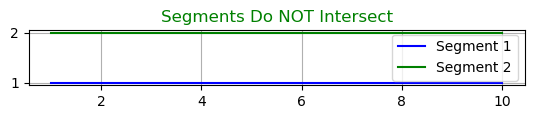

Intersect?


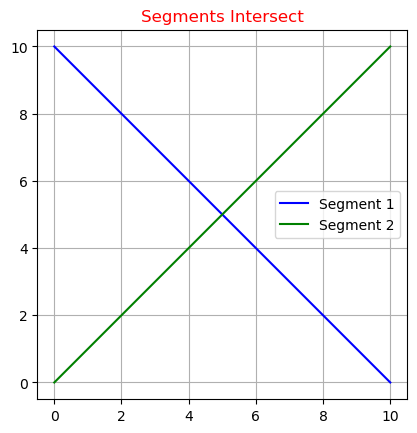

In [11]:
import matplotlib.pyplot as plt
from collections import namedtuple

Point = namedtuple("Point", "x y")

def on_segment(p, q, r):
    return min(p.x, r.x) <= q.x <= max(p.x, r.x) and min(p.y, r.y) <= q.y <= max(p.y, r.y)

def orientation(p, q, r):
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0  # colinear
    return 1 if val > 0 else 2  # 1: clockwise, 2: counterclockwise

def do_intersect(p1, q1, p2, q2):
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True
    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, q2, q1): return True
    if o3 == 0 and on_segment(p2, p1, q2): return True
    if o4 == 0 and on_segment(p2, q1, q2): return True
    return False

def plot_segments(p1, q1, p2, q2):
    fig, ax = plt.subplots()
    ax.plot([p1.x, q1.x], [p1.y, q1.y], 'b-', label='Segment 1')
    ax.plot([p2.x, q2.x], [p2.y, q2.y], 'g-', label='Segment 2')
    
    if do_intersect(p1, q1, p2, q2):
        plt.title("Segments Intersect", color='red')
    else:
        plt.title("Segments Do NOT Intersect", color='green')
    
    ax.legend()
    ax.set_aspect('equal')
    ax.grid(True)
    plt.show()

# Test case 1: No intersection
A, B = Point(1, 1), Point(10, 1)
C, D = Point(1, 2), Point(10, 2)
print("Intersect?" if do_intersect(A, B, C, D) else "Don't intersect")
plot_segments(A, B, C, D)

# Test case 2: Intersect
E, F = Point(10, 0), Point(0, 10)
G, H = Point(0, 0), Point(10, 10)
print("Intersect?" if do_intersect(E, F, G, H) else "Don't intersect")
plot_segments(E, F, G, H)



In [37]:
#String hashing

Hash of 'abc': 96354
Hash of 'abc' at 3–6: 96354
Hash equal? True


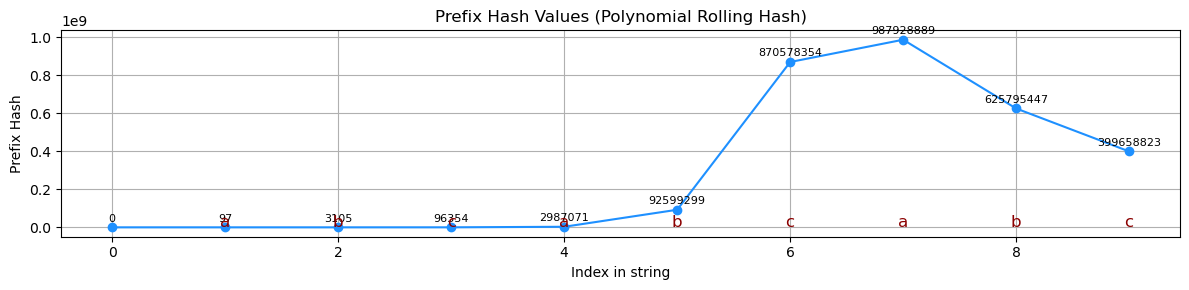

In [12]:
import matplotlib.pyplot as plt

class Hasher:
    def __init__(self, s, base=31, mod=10**9+7):
        self.s = s
        self.n = len(s)
        self.base = base
        self.mod = mod
        self.prefix = [0] * (self.n + 1)
        self.power = [1] * (self.n + 1)
        self.build()

    def build(self):
        for i in range(self.n):
            self.prefix[i+1] = (self.prefix[i] * self.base + ord(self.s[i])) % self.mod
            self.power[i+1] = (self.power[i] * self.base) % self.mod

    def get_hash(self, l, r):  # [l, r)
        return (self.prefix[r] - self.prefix[l] * self.power[r - l]) % self.mod

    def plot_hashes(self):
        fig, ax = plt.subplots(figsize=(12, 3))
        x = list(range(self.n + 1))
        y = self.prefix
        chars = [''] + list(self.s)  # add dummy '' for index alignment

        ax.plot(x, y, marker='o', linestyle='-', color='dodgerblue')
        for i in range(self.n + 1):
            ax.text(x[i], y[i] + max(y)*0.03, f'{y[i]}', ha='center', fontsize=8)
            if i > 0:
                ax.text(x[i], 0, chars[i], ha='center', fontsize=12, color='darkred')

        ax.set_title("Prefix Hash Values (Polynomial Rolling Hash)")
        ax.set_xlabel("Index in string")
        ax.set_ylabel("Prefix Hash")
        ax.grid(True)
        plt.tight_layout()
        plt.show()


# Example usage
s = "abcabcabc"
h = Hasher(s)
print("Hash of 'abc':", h.get_hash(0, 3))
print("Hash of 'abc' at 3–6:", h.get_hash(3, 6))
print("Hash equal?", h.get_hash(0, 3) == h.get_hash(3, 6))

# Visualize hash values
h.plot_hashes()


In [39]:
#heavy Light decomposition

Node positions in segment tree: [0, 1, 4, 2, 3, 5, 6]
Head of each node's chain: [0, 0, 2, 0, 4, 2, 6]


C:\Users\KRISHNENDU\AppData\Local\Temp\ipykernel_17344\312938924.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap("tab10")


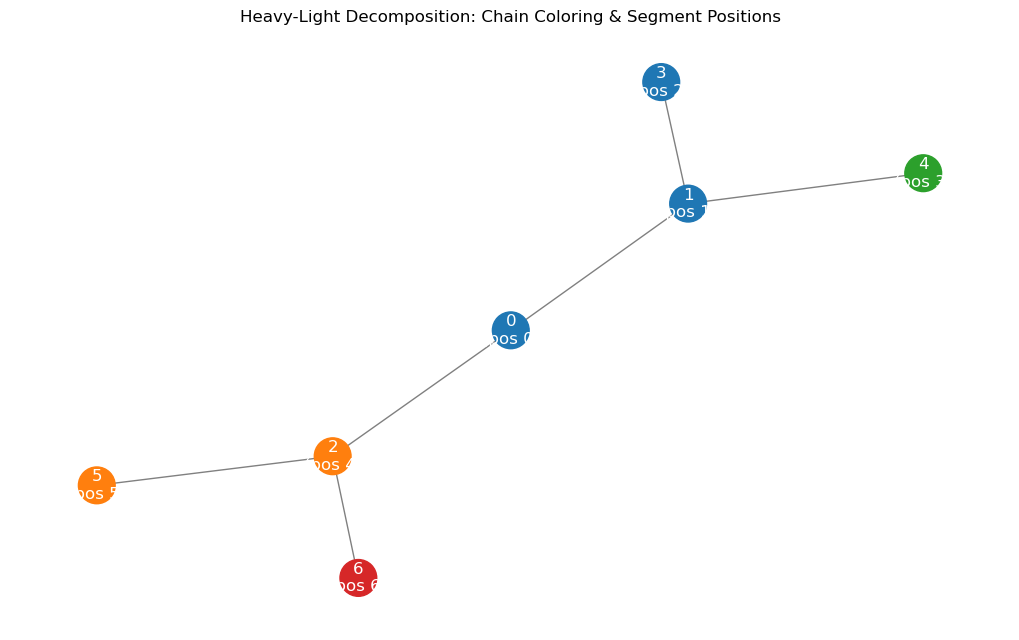

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

class HLD:
    def __init__(self, n):
        self.n = n
        self.tree = defaultdict(list)
        self.size = [0] * n
        self.depth = [0] * n
        self.parent = [-1] * n
        self.heavy = [-1] * n
        self.head = [0] * n
        self.pos = [0] * n
        self.current_pos = 0

    def add_edge(self, u, v):
        self.tree[u].append(v)
        self.tree[v].append(u)

    def dfs(self, v, p):
        self.size[v] = 1
        max_size = 0
        for u in self.tree[v]:
            if u != p:
                self.parent[u] = v
                self.depth[u] = self.depth[v] + 1
                self.dfs(u, v)
                self.size[v] += self.size[u]
                if self.size[u] > max_size:
                    max_size = self.size[u]
                    self.heavy[v] = u

    def decompose(self, v, h):
        self.head[v] = h
        self.pos[v] = self.current_pos
        self.current_pos += 1
        if self.heavy[v] != -1:
            self.decompose(self.heavy[v], h)
            for u in self.tree[v]:
                if u != self.parent[v] and u != self.heavy[v]:
                    self.decompose(u, u)

    def visualize(self):
        G = nx.Graph()
        for u in self.tree:
            for v in self.tree[u]:
                if u < v:  # avoid double-adding edges
                    G.add_edge(u, v)

        pos_layout = nx.spring_layout(G, seed=42)

        # Assign unique colors for chains
        chain_colors = {}
        color_palette = plt.cm.get_cmap("tab10")
        for i, h in enumerate(set(self.head)):
            chain_colors[h] = color_palette(i % 10)

        node_colors = [chain_colors[self.head[node]] for node in G.nodes()]
        labels = {i: f"{i}\n(pos {self.pos[i]})" for i in range(self.n)}

        plt.figure(figsize=(10, 6))
        nx.draw(G, pos_layout, with_labels=False, node_color=node_colors, node_size=700, edge_color='gray')
        nx.draw_networkx_labels(G, pos_layout, labels=labels, font_color='white')
        plt.title("Heavy-Light Decomposition: Chain Coloring & Segment Positions")
        plt.axis('off')
        plt.show()


# Example usage
n = 7
hld = HLD(n)
edges = [(0,1), (0,2), (1,3), (1,4), (2,5), (2,6)]
for u, v in edges:
    hld.add_edge(u, v)
hld.dfs(0, -1)
hld.decompose(0, 0)

print("Node positions in segment tree:", hld.pos)
print("Head of each node's chain:", hld.head)

# Visualize the decomposition
hld.visualize()



In [41]:
#DSU

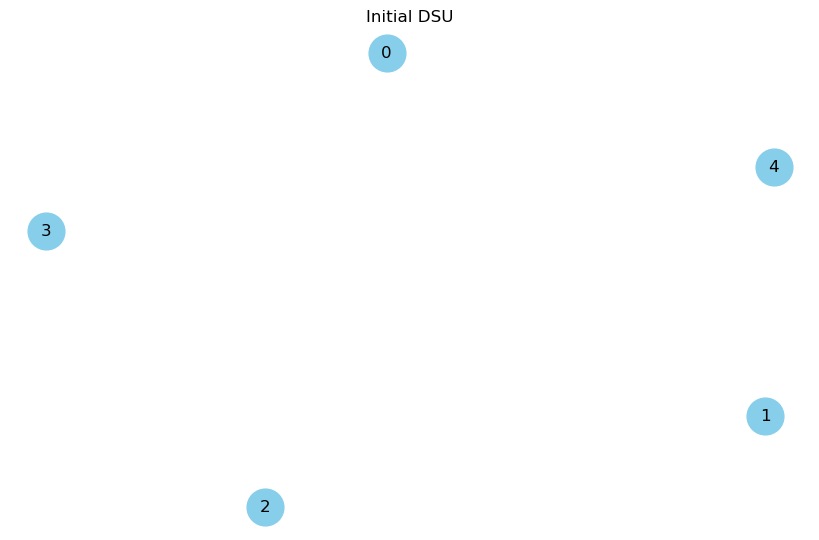

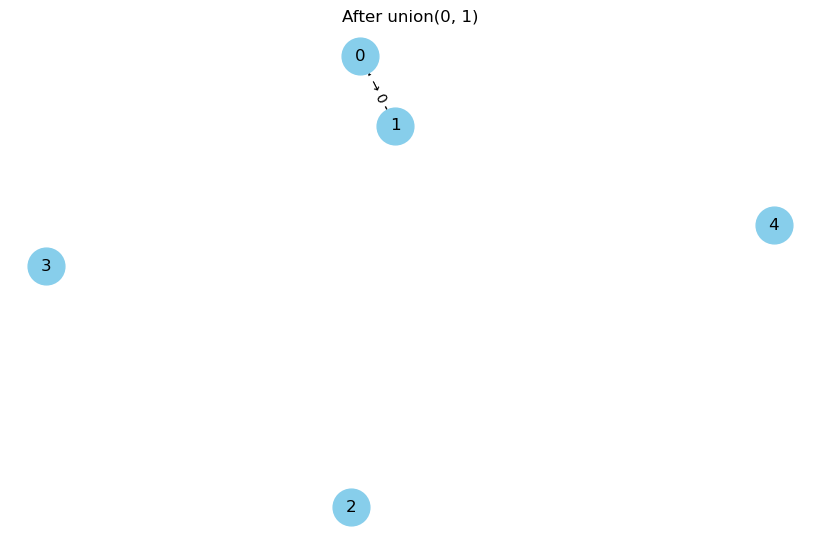

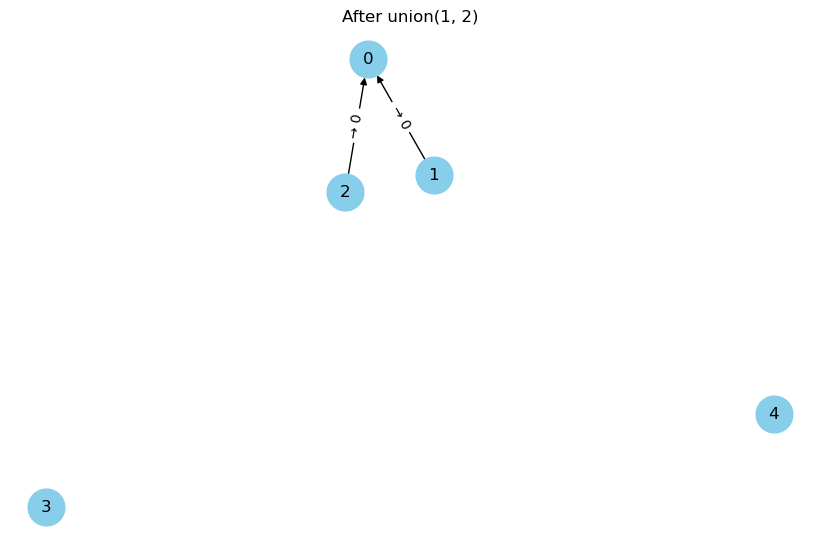

Find(2): 0


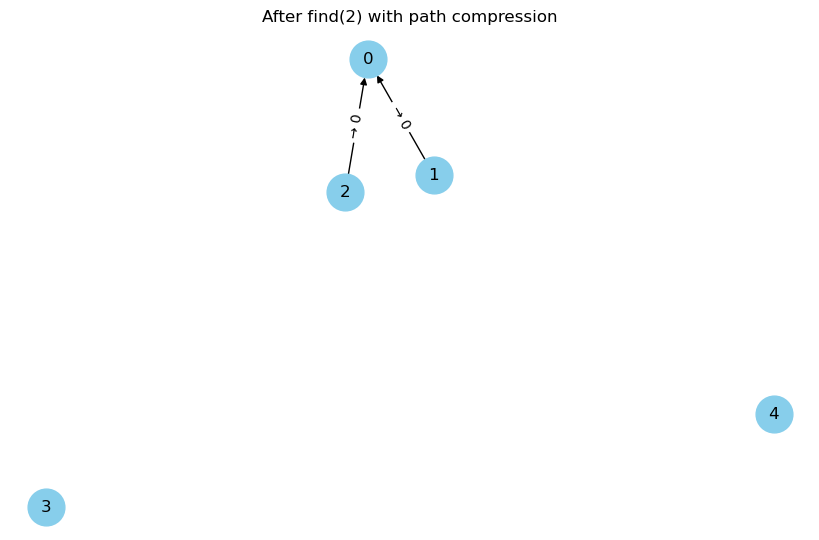

Find(3): 3


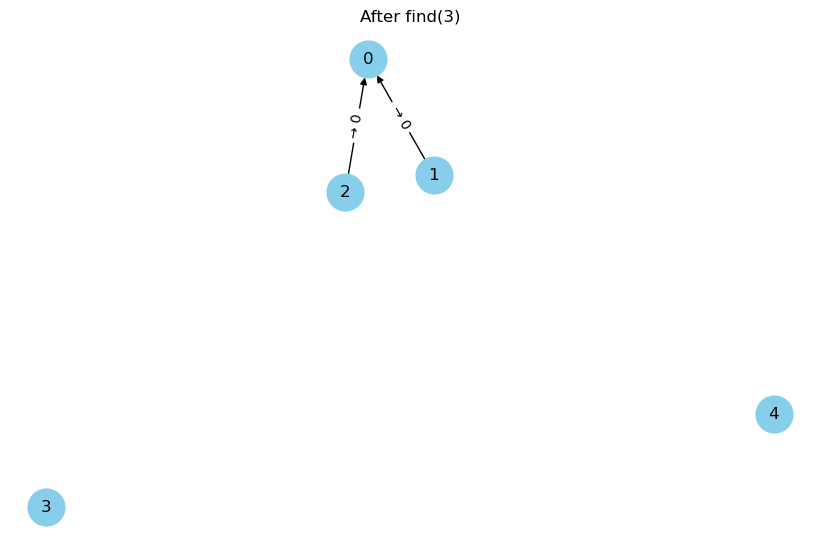

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

class DSU:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.n = n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Path compression
        return self.parent[x]

    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)
        if xroot == yroot:
            return False
        if self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        else:
            self.parent[yroot] = xroot
            if self.rank[xroot] == self.rank[yroot]:
                self.rank[xroot] += 1
        return True

    def visualize(self, title="DSU State"):
        G = nx.DiGraph()
        for i in range(self.n):
            G.add_node(i)
            if self.parent[i] != i:
                G.add_edge(i, self.parent[i])  # Point to parent

        pos = nx.spring_layout(G, seed=42)
        plt.figure(figsize=(8, 5))
        nx.draw(G, pos, with_labels=True, arrows=True, node_size=700, node_color="skyblue")
        edge_labels = {(i, self.parent[i]): f'→ {self.parent[i]}' for i in range(self.n) if self.parent[i] != i}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(title)
        plt.axis('off')
        plt.show()


# Example usage
dsu = DSU(5)
dsu.visualize("Initial DSU")

dsu.union(0, 1)
dsu.visualize("After union(0, 1)")

dsu.union(1, 2)
dsu.visualize("After union(1, 2)")

print("Find(2):", dsu.find(2))
dsu.visualize("After find(2) with path compression")

print("Find(3):", dsu.find(3))
dsu.visualize("After find(3)")


In [43]:
# Mo's Algorithm for offline range query processing

In [44]:
# Mo's Algorithm for offline range query processing

import math

class MoAlgorithm:
    def __init__(self, arr):
        self.arr = arr
        self.n = len(arr)
        self.block_size = int(math.sqrt(self.n))
        self.freq = {}
        self.current_answer = 0
        self.answers = []

    def add(self, index):
        val = self.arr[index]
        self.freq[val] = self.freq.get(val, 0) + 1
        if self.freq[val] == 1:
            self.current_answer += 1

    def remove(self, index):
        val = self.arr[index]
        self.freq[val] -= 1
        if self.freq[val] == 0:
            self.current_answer -= 1

    def process_queries(self, queries):
        queries = sorted(queries, key=lambda x: (x[0] // self.block_size, x[1]))
        l, r = 0, 0
        self.answers = [0] * len(queries)
        for i, (ql, qr, idx) in enumerate(queries):
            while l > ql:
                l -= 1
                self.add(l)
            while r <= qr:
                self.add(r)
                r += 1
            while l < ql:
                self.remove(l)
                l += 1
            while r > qr + 1:
                r -= 1
                self.remove(r)
            self.answers[idx] = self.current_answer
        return self.answers

# Example usage:
arr = [1, 1, 2, 1, 3]
queries = [(0, 4, 0), (1, 3, 1), (2, 4, 2)]
mo = MoAlgorithm(arr)
answers = mo.process_queries(queries)
print("Query answers:", answers)


Query answers: [3, 2, 3]


In [45]:
#Sparse table


Minimum in range [1, 4]: 2


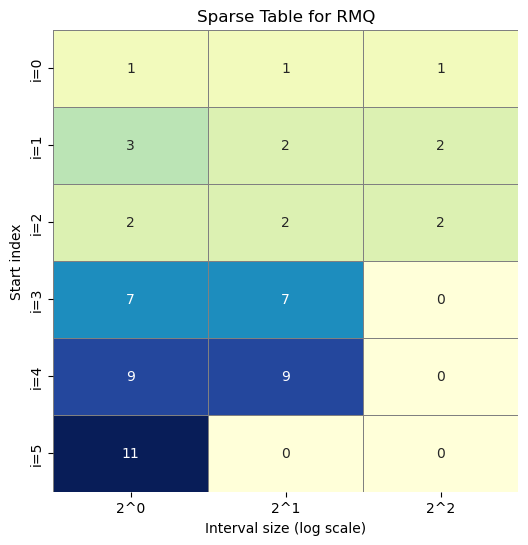

In [15]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

class SparseTable:
    def __init__(self, arr):
        self.n = len(arr)
        self.k = int(math.log2(self.n)) + 1
        self.st = [[0] * self.k for _ in range(self.n)]
        self.build(arr)

    def build(self, arr):
        for i in range(self.n):
            self.st[i][0] = arr[i]
        for j in range(1, self.k):
            for i in range(self.n - (1 << j) + 1):
                self.st[i][j] = min(self.st[i][j-1], self.st[i + (1 << (j - 1))][j - 1])

    def query(self, l, r):
        j = int(math.log2(r - l + 1))
        return min(self.st[l][j], self.st[r - (1 << j) + 1][j])

    def visualize(self):
        plt.figure(figsize=(self.k + 3, self.n))
        ax = sns.heatmap(
            self.st, annot=True, fmt='d', cbar=False,
            cmap="YlGnBu", linewidths=0.5, linecolor='gray',
            xticklabels=[f"2^{j}" for j in range(self.k)],
            yticklabels=[f"i={i}" for i in range(self.n)]
        )
        ax.set_title("Sparse Table for RMQ")
        ax.set_xlabel("Interval size (log scale)")
        ax.set_ylabel("Start index")
        plt.show()


# Example usage:
arr = [1, 3, 2, 7, 9, 11]
st = SparseTable(arr)
print("Minimum in range [1, 4]:", st.query(1, 4))

# Visualize sparse table
st.visualize()


In [47]:
#Centrod decomposition

Centroid Tree: {0: [1, 2], 1: [0, 3, 4], 3: [1], 4: [1], 2: [0, 5, 6], 5: [2], 6: [2]}


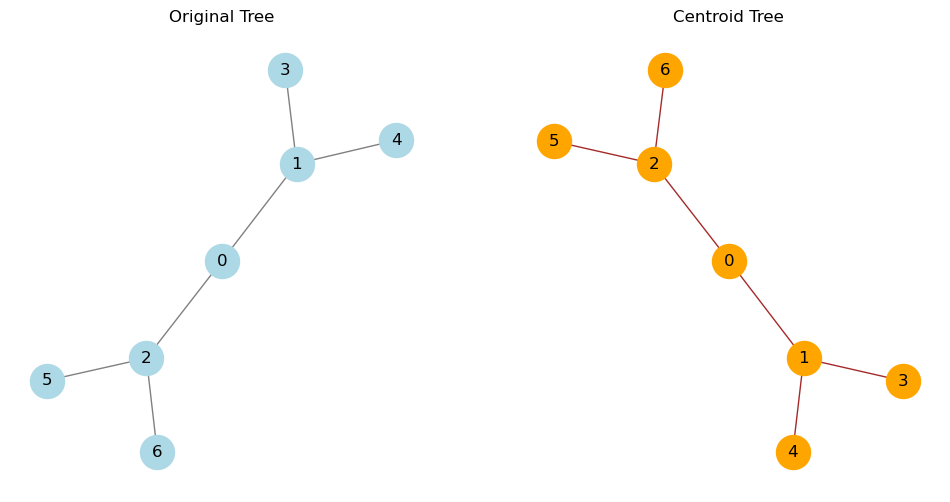

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

class CentroidDecomposition:
    def __init__(self, n):
        self.n = n
        self.tree = defaultdict(list)
        self.subtree_size = [0] * n
        self.centroid_marked = [False] * n
        self.centroid_tree = defaultdict(list)

    def add_edge(self, u, v):
        self.tree[u].append(v)
        self.tree[v].append(u)

    def dfs(self, u, parent):
        self.subtree_size[u] = 1
        for v in self.tree[u]:
            if v != parent and not self.centroid_marked[v]:
                self.dfs(v, u)
                self.subtree_size[u] += self.subtree_size[v]

    def find_centroid(self, u, parent, total_nodes):
        for v in self.tree[u]:
            if v != parent and not self.centroid_marked[v]:
                if self.subtree_size[v] > total_nodes // 2:
                    return self.find_centroid(v, u, total_nodes)
        return u

    def decompose(self, u, parent):
        self.dfs(u, -1)
        centroid = self.find_centroid(u, -1, self.subtree_size[u])
        self.centroid_marked[centroid] = True
        if parent != -1:
            self.centroid_tree[parent].append(centroid)
            self.centroid_tree[centroid].append(parent)
        for v in self.tree[centroid]:
            if not self.centroid_marked[v]:
                self.decompose(v, centroid)

    def visualize(self):
        original = nx.Graph()
        for u in self.tree:
            for v in self.tree[u]:
                if u < v:
                    original.add_edge(u, v)

        centroid = nx.Graph()
        for u in self.centroid_tree:
            for v in self.centroid_tree[u]:
                if u < v:
                    centroid.add_edge(u, v)

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        pos1 = nx.spring_layout(original, seed=42)
        nx.draw(original, pos1, ax=axs[0], with_labels=True, node_color="lightblue", edge_color='gray', node_size=600)
        axs[0].set_title("Original Tree")

        pos2 = nx.spring_layout(centroid, seed=24)
        nx.draw(centroid, pos2, ax=axs[1], with_labels=True, node_color="orange", edge_color='brown', node_size=600)
        axs[1].set_title("Centroid Tree")

        plt.show()



n = 7
cd = CentroidDecomposition(n)
edges = [(0,1), (0,2), (1,3), (1,4), (2,5), (2,6)]
for u, v in edges:
    cd.add_edge(u, v)
cd.decompose(0, -1)

print("Centroid Tree:", dict(cd.centroid_tree))
cd.visualize()


In [1]:
#Centroid decomposition

Centroid tree parent relationships: [-1, 0, 0, 1, 1, 2, 2]


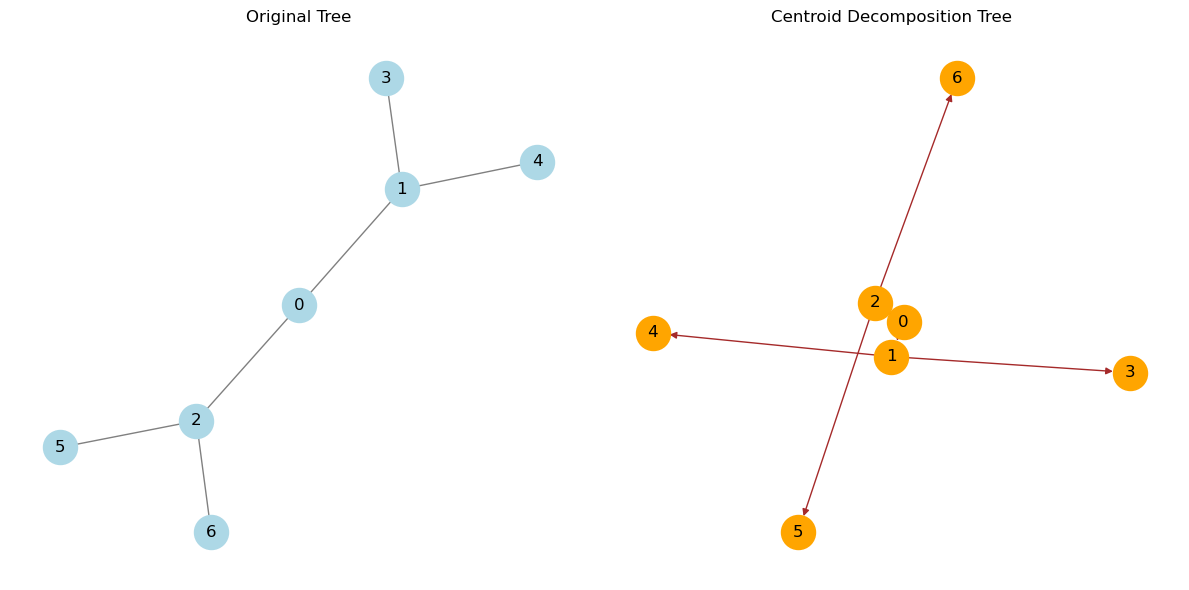

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

class CentroidDecomposition:
    def __init__(self, n):
        self.n = n
        self.tree = defaultdict(list)
        self.subtree_size = [0] * n
        self.centroid_marked = [False] * n
        self.parent = [-1] * n  # Centroid tree parent

    def add_edge(self, u, v):
        self.tree[u].append(v)
        self.tree[v].append(u)

    def dfs(self, u, p):
        self.subtree_size[u] = 1
        for v in self.tree[u]:
            if v != p and not self.centroid_marked[v]:
                self.dfs(v, u)
                self.subtree_size[u] += self.subtree_size[v]

    def find_centroid(self, u, p, n):
        for v in self.tree[u]:
            if v != p and not self.centroid_marked[v]:
                if self.subtree_size[v] > n // 2:
                    return self.find_centroid(v, u, n)
        return u

    def decompose(self, u, p):
        self.dfs(u, -1)
        centroid = self.find_centroid(u, -1, self.subtree_size[u])
        self.centroid_marked[centroid] = True
        self.parent[centroid] = p
        for v in self.tree[centroid]:
            if not self.centroid_marked[v]:
                self.decompose(v, centroid)

    def visualize(self):
        original = nx.Graph()
        for u in self.tree:
            for v in self.tree[u]:
                if u < v:
                    original.add_edge(u, v)

        centroid = nx.DiGraph()
        for u in range(self.n):
            if self.parent[u] != -1:
                centroid.add_edge(self.parent[u], u)

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        pos1 = nx.spring_layout(original, seed=42)
        nx.draw(original, pos1, ax=axs[0], with_labels=True, node_color="lightblue", edge_color='gray', node_size=600)
        axs[0].set_title("Original Tree")

        pos2 = nx.spring_layout(centroid, seed=24)
        nx.draw(centroid, pos2, ax=axs[1], with_labels=True, node_color="orange", edge_color='brown', node_size=600, arrows=True)
        axs[1].set_title("Centroid Decomposition Tree")

        plt.tight_layout()
        plt.show()

n = 7
cd = CentroidDecomposition(n)
edges = [(0,1), (0,2), (1,3), (1,4), (2,5), (2,6)]
for u, v in edges:
    cd.add_edge(u, v)
cd.decompose(0, -1)

print("Centroid tree parent relationships:", cd.parent)
cd.visualize()


In [3]:
#Suffix automaton

Number of distinct substrings: 9


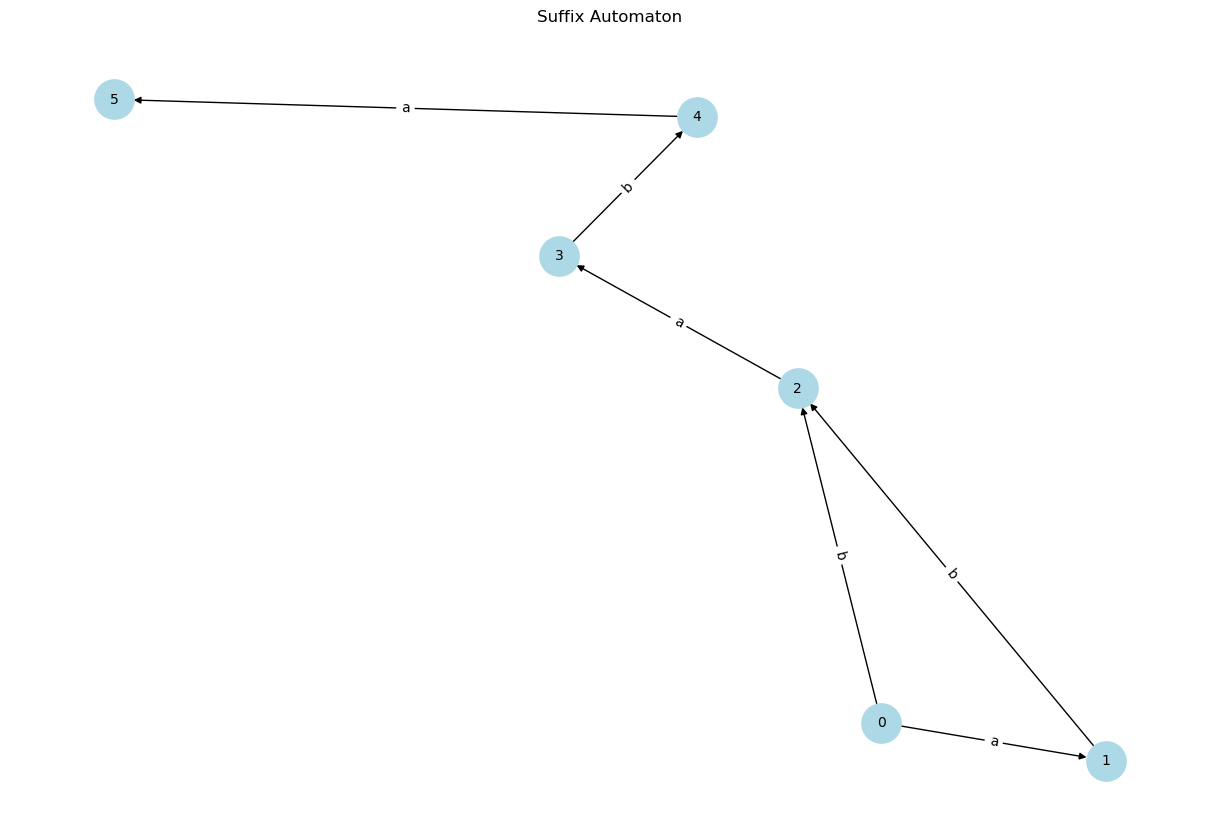

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_suffix_automaton(sa):
    G = nx.DiGraph()

    for i, state in enumerate(sa.states):
        G.add_node(i, label=f'{i} (len={state.len})')

        for c, j in state.next.items():
            G.add_edge(i, j, label=c)

    pos = nx.spring_layout(G, seed=42)
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10)
    
    # Draw edge labels (characters)
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title("Suffix Automaton")
    plt.axis("off")
    plt.show()


s = "ababa"
sa = SuffixAutomaton()
sa.build(s)
print("Number of distinct substrings:", sa.count_distinct_substrings())
visualize_suffix_automaton(sa)


In [5]:
#2-SAT

Satisfiable assignment:
Variable assignments: [True, True]


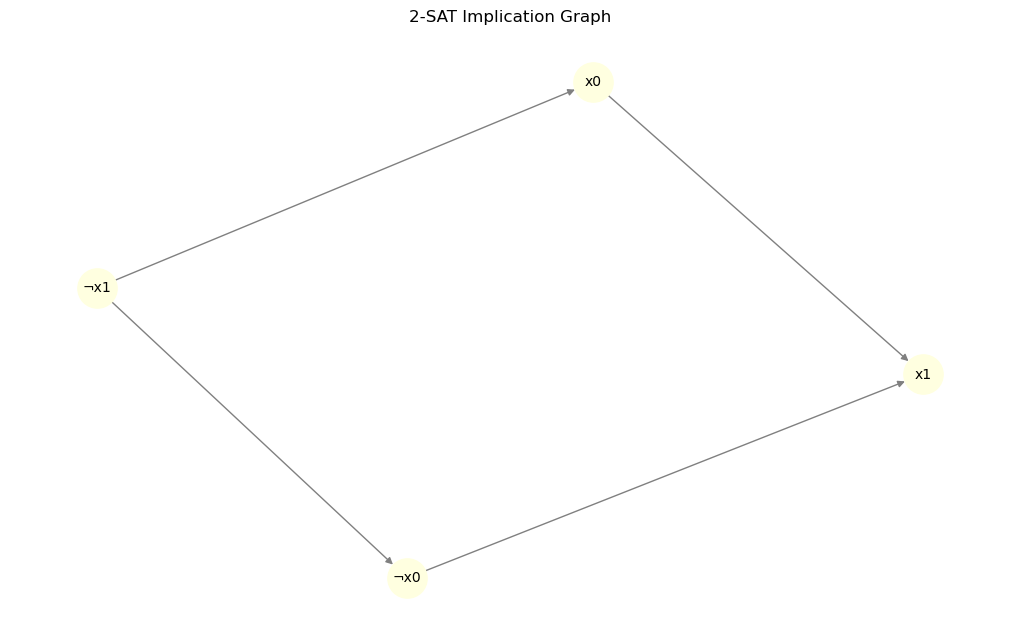

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_2sat(ts):
    G = nx.DiGraph()

    def var_label(i):
        return f"x{i//2}" if i % 2 == 0 else f"¬x{i//2}"

    for u in range(2 * ts.n):
        for v in ts.graph[u]:
            G.add_edge(var_label(u), var_label(v))

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightyellow", edge_color="gray", font_size=10)
    plt.title("2-SAT Implication Graph")
    plt.axis("off")
    plt.show()


ts = TwoSAT(2)
ts.add_clause(0, True, 1, True)   # x0 OR x1
ts.add_clause(0, False, 1, True)  # NOT x0 OR x1
result = ts.solve()
print("Satisfiable assignment:" if result else "Unsatisfiable")
if result:
    print("Variable assignments:", result)
visualize_2sat(ts)


In [7]:
#Meet in the middle

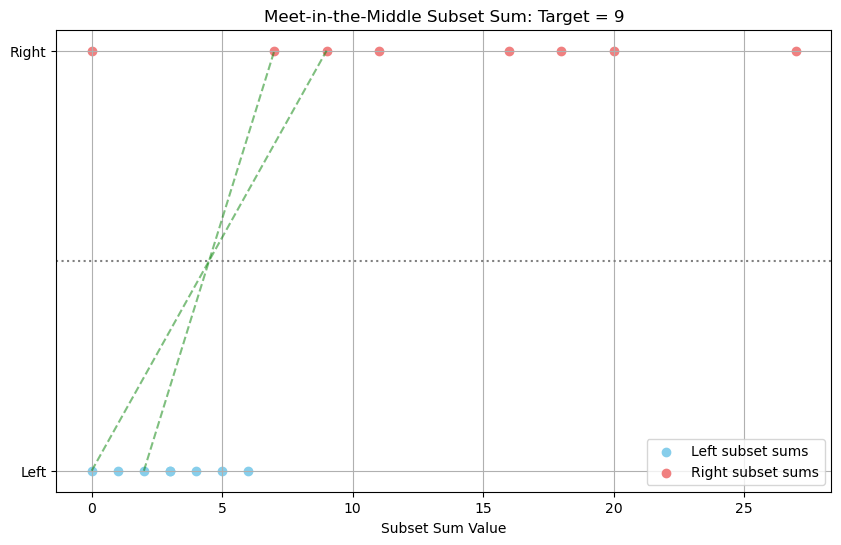

In [21]:
import matplotlib.pyplot as plt

def visualize_meet_in_middle(arr, target):
    n = len(arr)
    left = arr[:n//2]
    right = arr[n//2:]
    sum_left = subset_sums(left)
    sum_right = subset_sums(right)
    sum_right.sort()

    matches = []
    for s in sum_left:
        rem = target - s
        l, r = 0, len(sum_right) - 1
        while l <= r:
            m = (l + r) // 2
            if sum_right[m] == rem:
                matches.append((s, rem))
                break
            elif sum_right[m] < rem:
                l = m + 1
            else:
                r = m - 1

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(sum_left, [0]*len(sum_left), label='Left subset sums', color='skyblue')
    plt.scatter(sum_right, [1]*len(sum_right), label='Right subset sums', color='lightcoral')
    for lval, rval in matches:
        plt.plot([lval, rval], [0, 1], 'g--', alpha=0.5)

    plt.axhline(0.5, color='gray', linestyle='dotted')
    plt.yticks([0, 1], ['Left', 'Right'])
    plt.title(f'Meet-in-the-Middle Subset Sum: Target = {target}')
    plt.xlabel('Subset Sum Value')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_meet_in_middle(arr, target)


In [9]:
#Game theory

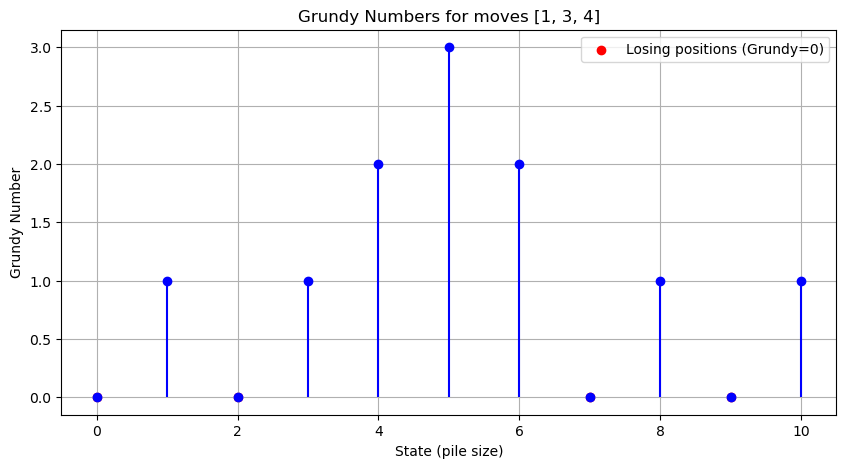

In [23]:
import matplotlib.pyplot as plt

def visualize_grundy(n, moves):
    dp = grundy(n, moves)
    plt.figure(figsize=(10, 5))
    markerline, stemlines, baseline = plt.stem(range(n + 1), dp, basefmt=" ")
    plt.setp(stemlines, 'color', 'blue')
    plt.setp(markerline, 'color', 'blue')
    
    # Highlight losing positions
    losing_x = [i for i, g in enumerate(dp) if g == 0]
    losing_y = [g for g in dp if g == 0]
    plt.scatter(losing_x, losing_y, color='red', label='Losing positions (Grundy=0)')
    
    plt.xlabel('State (pile size)')
    plt.ylabel('Grundy Number')
    plt.title(f'Grundy Numbers for moves {moves}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
n = 10
moves = [1, 3, 4]
visualize_grundy(n, moves)




In [24]:
#SCC

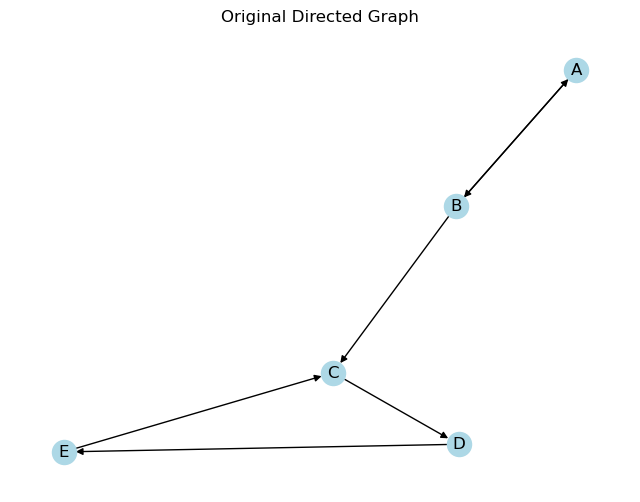

Strongly Connected Components:
Component 1: {'D', 'E', 'C'}
Component 2: {'B', 'A'}


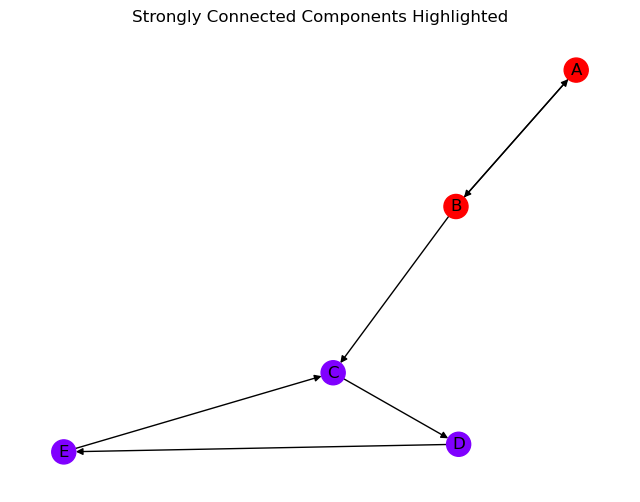

In [27]:
# Step 1: Import libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Helper for consistent plot size
plt.rcParams["figure.figsize"] = (8, 6)

# Step 2: Create a directed graph
G = nx.DiGraph()

# Step 3: Add edges
edges = [
    ('A', 'B'), ('B', 'A'),  # SCC 1: A <-> B
    ('C', 'D'), ('D', 'E'), ('E', 'C'),  # SCC 2: C -> D -> E -> C
    ('B', 'C')  # Link from SCC1 to SCC2
]
G.add_edges_from(edges)

# Step 4: Draw original graph
pos = nx.spring_layout(G, seed=42)
plt.title("Original Directed Graph")
nx.draw(G, pos, with_labels=True, node_color='lightblue', arrows=True)
plt.show()


# Compute strongly connected components
sccs = list(nx.strongly_connected_components(G))
print("Strongly Connected Components:")
for i, scc in enumerate(sccs):
    print(f"Component {i + 1}: {scc}")


# Assign a unique color to each SCC
import matplotlib.cm as cm
colors = list(cm.rainbow(np.linspace(0, 1, len(sccs))))

node_colors = {}
for color, scc in zip(colors, sccs):
    for node in scc:
        node_colors[node] = color

node_color_list = [node_colors[node] for node in G.nodes()]

plt.title("Strongly Connected Components Highlighted")
nx.draw(G, pos, with_labels=True, node_color=node_color_list, arrows=True)
plt.show()


In [28]:
#Bridges in graph

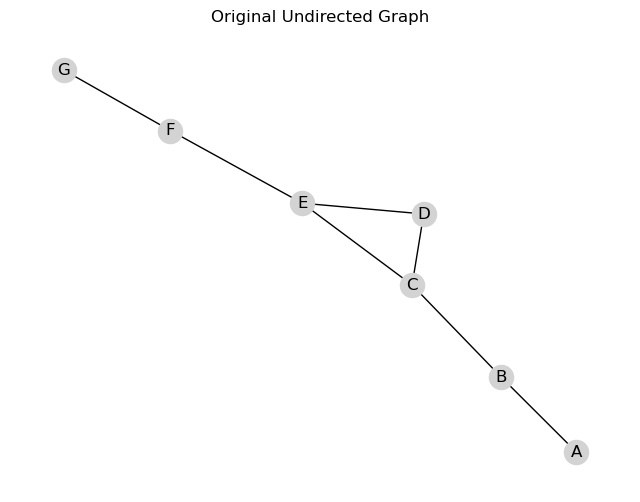

Bridges in the Graph:
A - B
B - C
E - F
F - G


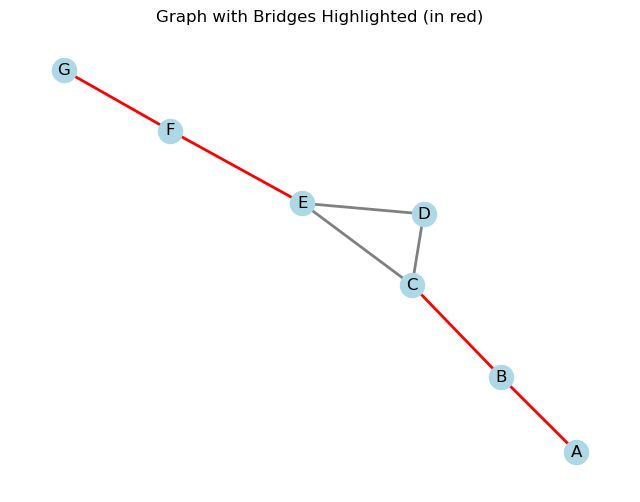

In [29]:
# Step 1: Import libraries
import networkx as nx
import matplotlib.pyplot as plt

# Step 2: Create an undirected graph
G = nx.Graph()

# Step 3: Add edges - small example with bridges
edges = [
    ('A', 'B'), ('B', 'C'),          # A-B-C (bridge: B-C)
    ('C', 'D'), ('D', 'E'), ('E', 'C'),  # cycle: C-D-E
    ('F', 'G'), ('E', 'F')           # bridge: E-F connects two parts
]
G.add_edges_from(edges)

# Step 4: Draw the original graph
pos = nx.spring_layout(G, seed=2)
plt.title("Original Undirected Graph")
nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='black')
plt.show()


# Step 5: Identify bridges
bridges = list(nx.bridges(G))
print("Bridges in the Graph:")
for u, v in bridges:
    print(f"{u} - {v}")


# Highlight bridges in red, others in gray
edge_colors = ['red' if edge in bridges or (edge[1], edge[0]) in bridges else 'gray' for edge in G.edges()]

plt.title("Graph with Bridges Highlighted (in red)")
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, width=2)
plt.show()


In [30]:
#Articulation point

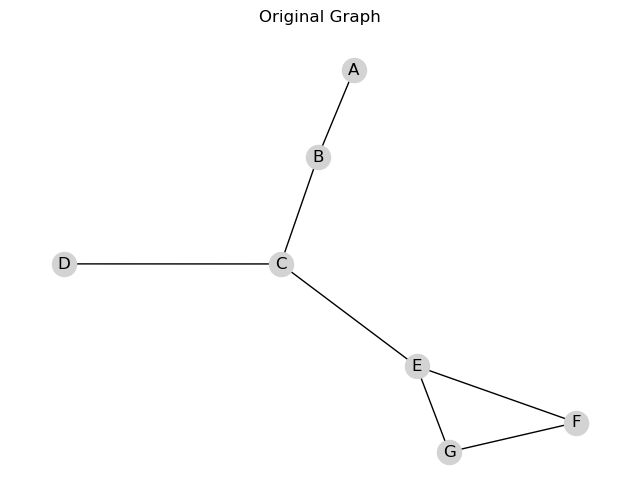

Articulation Points: ['C', 'E', 'B']


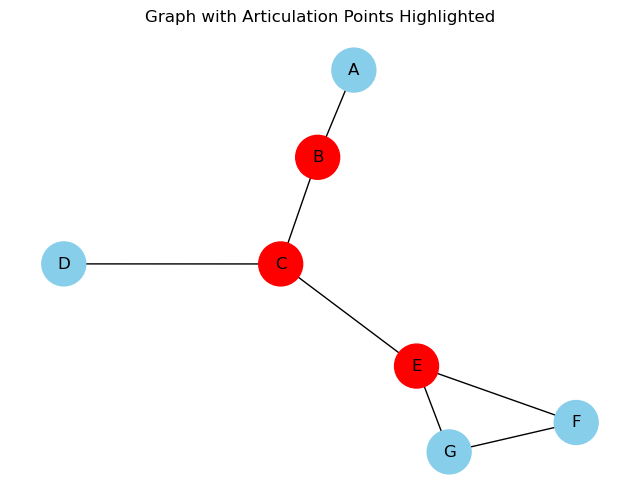

In [31]:
# Step 1: Import libraries
import networkx as nx
import matplotlib.pyplot as plt

# Step 2: Create a small undirected graph
G = nx.Graph()

# Step 3: Add edges with a known articulation point
edges = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'),  # A-B-C-D is a path
    ('C', 'E'), ('E', 'F'), ('E', 'G'),  # E connects a subgraph
    ('F', 'G')  # makes a cycle at one end
]
G.add_edges_from(edges)

# Step 4: Draw original graph
pos = nx.spring_layout(G, seed=42)
plt.title("Original Graph")
nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='black')
plt.show()


# Step 5: Use NetworkX to find articulation points
articulation_points = list(nx.articulation_points(G))
print("Articulation Points:", articulation_points)

# Step 6: Color articulation points red, others blue
node_colors = ['red' if node in articulation_points else 'skyblue' for node in G.nodes()]

plt.title("Graph with Articulation Points Highlighted")
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=1000)
plt.show()


In [32]:
#kruskal

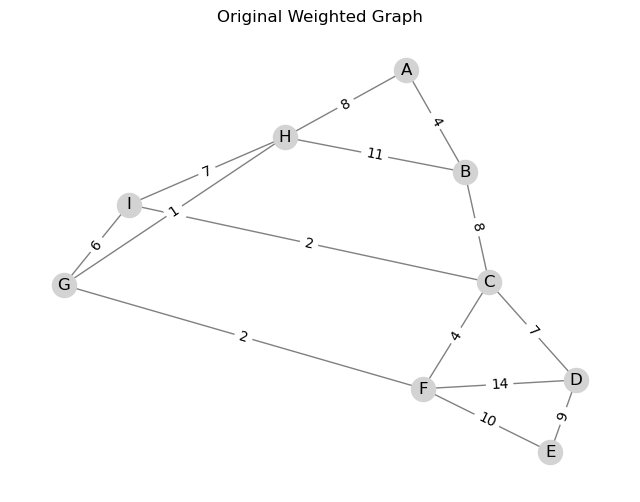

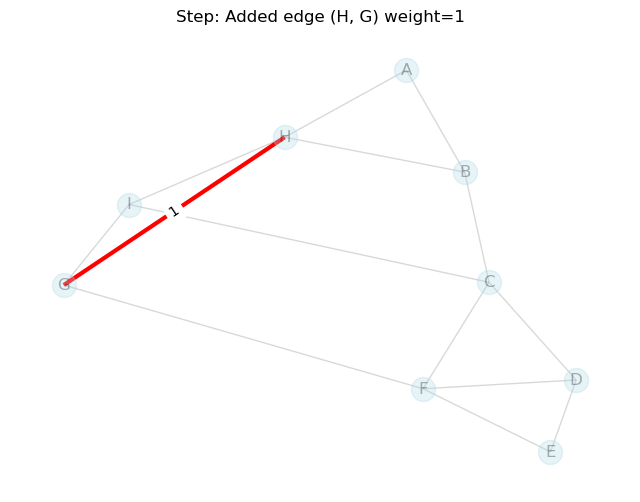

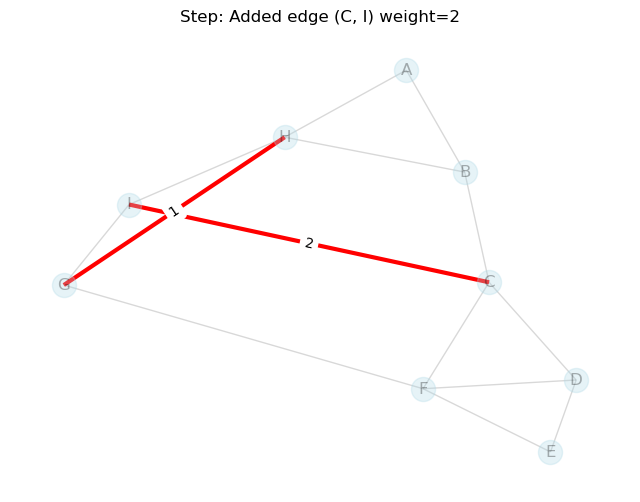

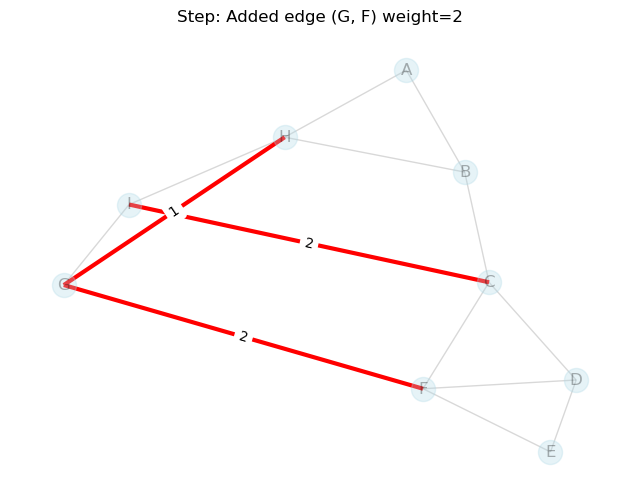

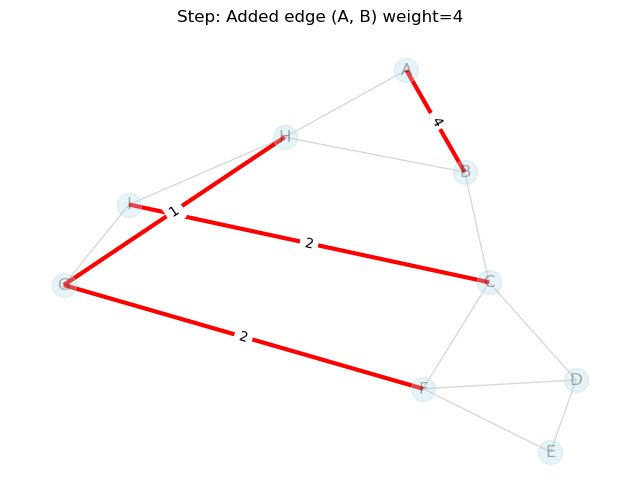

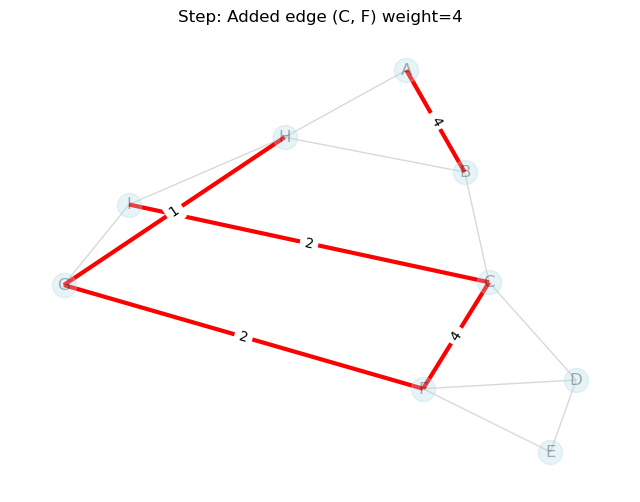

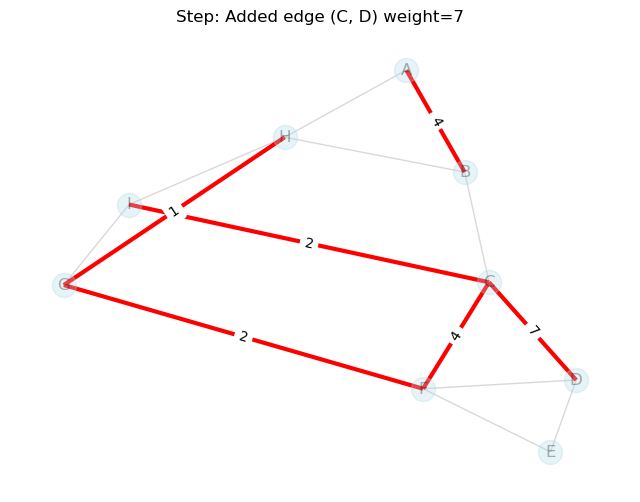

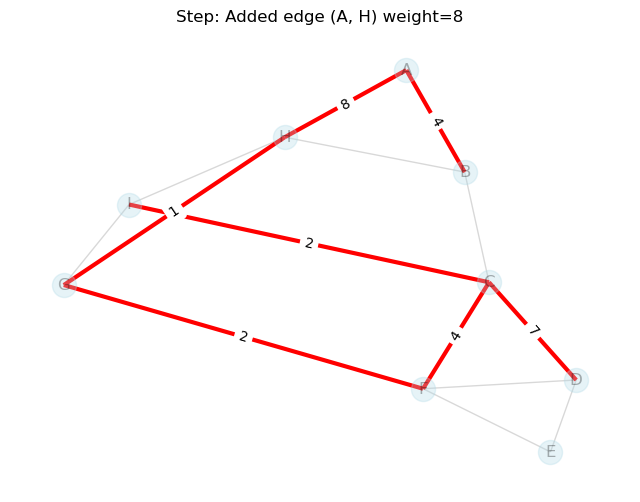

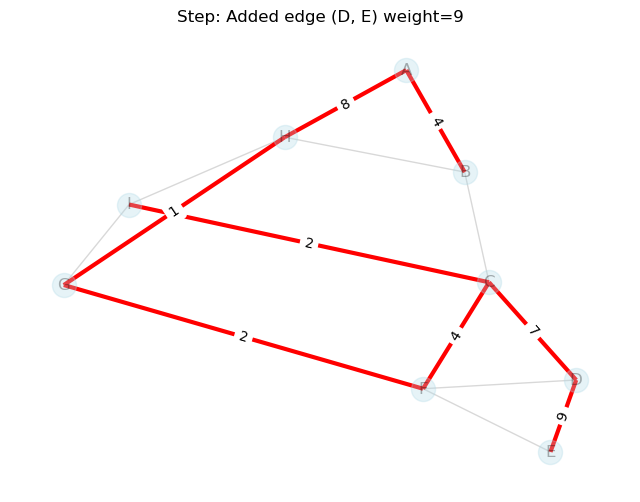

Minimum Spanning Tree Edges:
H - G (weight: 1)
C - I (weight: 2)
G - F (weight: 2)
A - B (weight: 4)
C - F (weight: 4)
C - D (weight: 7)
A - H (weight: 8)
D - E (weight: 9)


In [33]:
# Step 1: Imports
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter

# For consistent graph layout
plt.rcParams["figure.figsize"] = (8, 6)


# Create an undirected weighted graph
G = nx.Graph()

edges = [
    ('A', 'B', 4),
    ('A', 'H', 8),
    ('B', 'H', 11),
    ('B', 'C', 8),
    ('C', 'I', 2),
    ('H', 'I', 7),
    ('H', 'G', 1),
    ('I', 'G', 6),
    ('G', 'F', 2),
    ('C', 'F', 4),
    ('C', 'D', 7),
    ('D', 'F', 14),
    ('D', 'E', 9),
    ('F', 'E', 10)
]

# Add edges
G.add_weighted_edges_from(edges)

# Layout
pos = nx.spring_layout(G, seed=42)

# Draw full graph with edge weights
plt.title("Original Weighted Graph")
nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


# Step 3: Sort edges by weight
sorted_edges = sorted(edges, key=itemgetter(2))

# Step 4: Initialize Disjoint Set
parent = {}

def find(u):
    while parent[u] != u:
        parent[u] = parent[parent[u]]
        u = parent[u]
    return u

def union(u, v):
    parent[find(u)] = find(v)

# Initialize each node's parent to itself
for node in G.nodes():
    parent[node] = node

# Store MST edges
mst_edges = []

# Step-by-step Kruskal
for u, v, w in sorted_edges:
    if find(u) != find(v):
        mst_edges.append((u, v, w))
        union(u, v)

        # Draw current MST step
        plt.title(f"Step: Added edge ({u}, {v}) weight={w}")
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', alpha=0.3)
        nx.draw_networkx_edges(G, pos, edgelist=[(a, b) for a, b, _ in mst_edges], width=3, edge_color='red')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(a, b): wt for a, b, wt in mst_edges})
        plt.show()


print("Minimum Spanning Tree Edges:")
for u, v, w in mst_edges:
    print(f"{u} - {v} (weight: {w})")
